**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


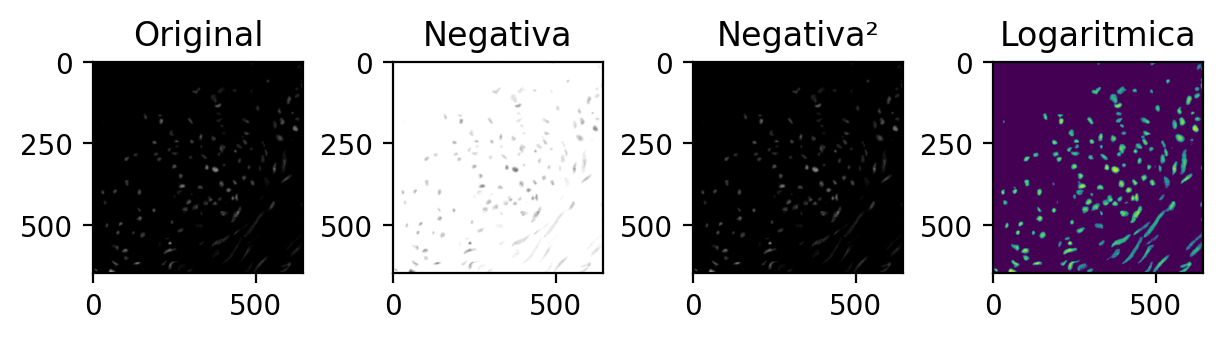

In [23]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

img_inv = 255-img
img_ori = 255-img_inv
img_log = np.log1p(img)

fig, axes = plt.subplots(1,4, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Negativa")
axes[1].imshow(img_inv, cmap='gray', vmin=0, vmax=255)
axes[2].set_title("Negativa²")
axes[2].imshow(img_ori, cmap='gray', vmin=0, vmax=255)
axes[3].set_title("Logaritmica")
axes[3].imshow(img_log)

# Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
# Para perceber pequenas mudanças é mais fácil observar a imagem invertida, 
# pois os olhos humanos detectam variações de branco melhor do que variações de preto.


2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



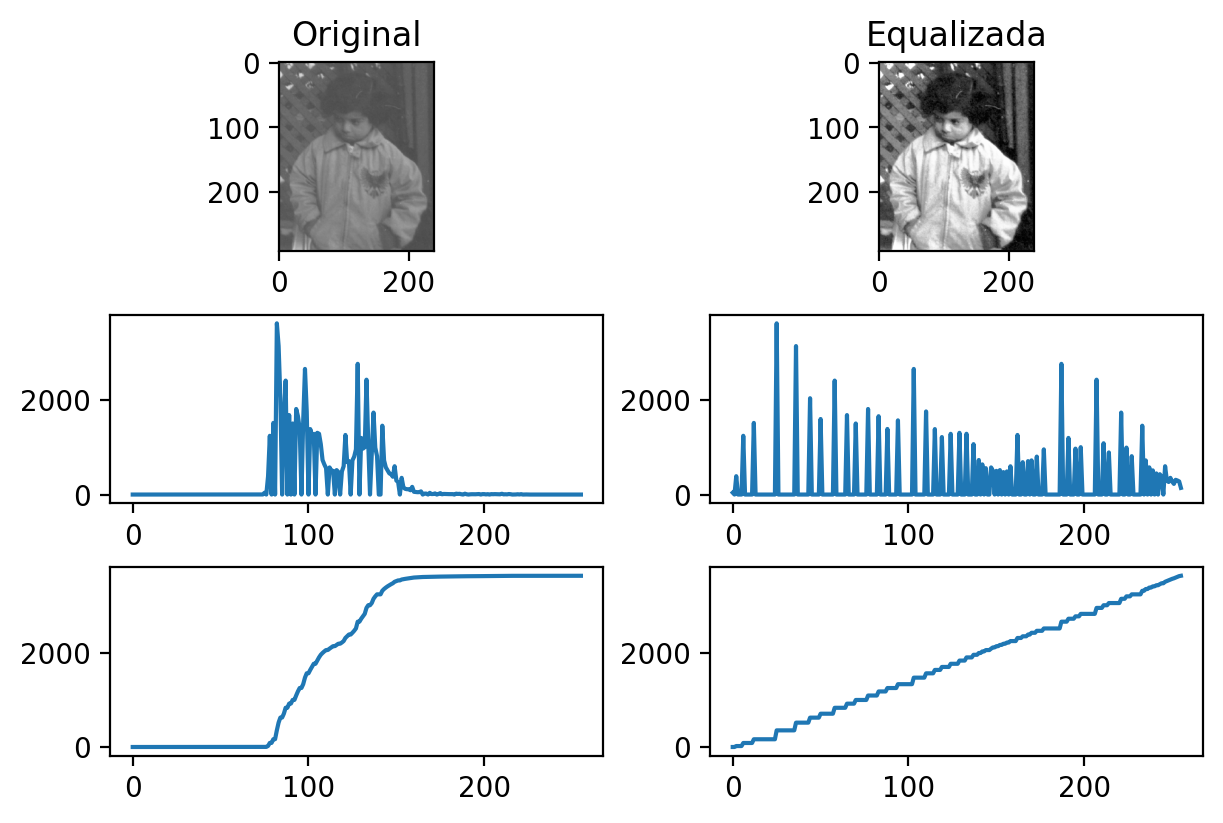

In [5]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

def histograma(img):
    hist = np.zeros(256)
    linhas, colunas = img.shape
    for x in range(linhas):
        for y in range(colunas):
            hist[img[x][y]] += 1
    return hist

hist = histograma(img)
img_eq = cv2.equalizeHist(img)
hist_eq = histograma(img_eq)
cdf = np.cumsum(hist)
cdf = cdf * float(np.max(hist)/cdf.max())
cdf_eq = np.cumsum(hist_eq)
cdf_eq = cdf_eq * float(np.max(hist_eq)/cdf_eq.max())

fig, axes = plt.subplots(3,2, layout="constrained")
axes[0,0].set_title("Original")
axes[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title("Equalizada")
axes[0,1].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
axes[1,0].plot(hist)
axes[1,1].plot(hist_eq)
axes[2,0].plot(cdf)
axes[2,1].plot(cdf_eq)

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

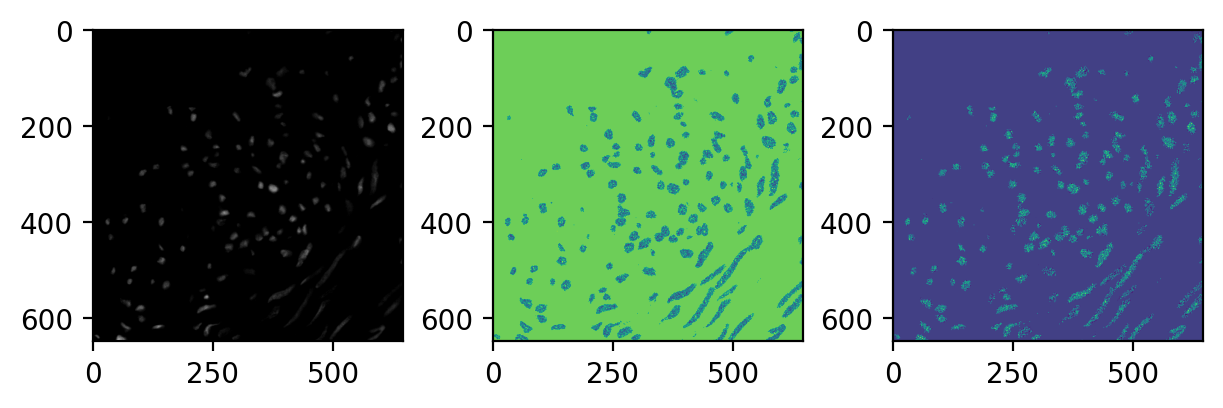

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

def histograma(img):
    hist = np.zeros(256)
    linhas, colunas = img.shape
    for x in range(linhas):
        for y in range(colunas):
            hist[img[x][y]] += 1
    return hist

def eq_hist(img):
    hist = histograma(img)
    cdf = np.cumsum(hist)
    cdf = (cdf - cdf.min() * 255 / (cdf.max() - cdf.min()))
    cdf = cdf.astype('uint8')
    img_eq = cdf[img]
    return img_eq

img_eq1 = eq_hist(img)
img_eq2 = eq_hist(img_eq1)

fig, axes = plt.subplots(1,3, layout="constrained")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(img_eq1)
axes[2].imshow(img_eq2)